### Kategorik Değişken Analizi (Analysis of Categorical Variables)

* Gözlemlemiş olmalıyız ki iş yapısal noktalara dokunup genellenebilirlik (ölçeklenebilirlik) kaygısıyla ilerlediğinde daha yüksek seviyeden olaya baktığımızda olası problemleri göz önünde bulunduracak şekilde ilerlememiz gerekiyor. Dolayısıyla bu tip uzun soluklu ölçeklenebilirlik kaygısı hataları genel olarak kapsayıcılık gibi konular konuşulduğunda genel bir eğilimde olunması tavsiye edilir. Bu eğilim nedir denilecek olursa basitliktir. 

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [31]:
df["survived"].value_counts()

0    549
1    342
Name: survived, dtype: int64

In [32]:
df["sex"].unique()

array(['male', 'female'], dtype=object)

In [33]:
df["class"].nunique()

3

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [35]:
cat_cols = [col for col in df.columns if str(df[col].dtypes) in ["category", "object", "bool"]]
cat_cols

['sex',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone']

In [36]:
num_but_cat = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtypes in ["int64", "float64"]]
num_but_cat

['survived', 'pclass', 'sibsp', 'parch']

In [37]:
cat_but_cardinal = [col for col in df.columns if df[col].nunique() > 20 and str(df[col].dtypes) in ["category", "object"]]
cat_but_cardinal

[]

In [25]:
cat_but_car = [col for col in df.columns if df[col].nunique() > 20 and str(df[col].dtypes) in ["category", "object"]]

cat_cols = cat_cols + num_but_cat

cat_cols = [col for col in cat_cols if col not in cat_but_car]

cat_cols

['sex',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone',
 'survived',
 'pclass',
 'sibsp',
 'parch',
 'survived',
 'pclass',
 'sibsp',
 'parch']

In [38]:
cat_but_car = [col for col in df.columns if df[col].nunique() > 20 and str(df[col].dtypes) in ["category", "object"]]

In [39]:
cat_cols = cat_cols + num_but_cat

In [40]:
cat_cols = [col for col in cat_cols if col not in cat_but_car]

In [41]:
df[cat_cols]

,sex,embarked,class,who,adult_male,deck,embark_town,alive,alone,survived,pclass,sibsp,parch
0,male,S,Third,man,True,NaN,Southampton,no,False,0,3,1,0
1,female,C,First,woman,False,C,Cherbourg,yes,False,1,1,1,0
2,female,S,Third,woman,False,NaN,Southampton,yes,True,1,3,0,0
3,female,S,First,woman,False,C,Southampton,yes,False,1,1,1,0
4,male,S,Third,man,True,NaN,Southampton,no,True,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,male,S,Second,man,True,NaN,Southampton,no,True,0,2,0,0
887,female,S,First,woman,False,B,Southampton,yes,True,1,1,0,0
888,female,S,Third,woman,False,NaN,Southampton,no,False,0,3,1,2
889,male,C,First,man,True,C,Cherbourg,yes,True,1,1,0,0


In [42]:
df[cat_cols].nunique()

sex            2
embarked       3
class          3
who            3
adult_male     2
deck           7
embark_town    3
alive          2
alone          2
survived       2
pclass         3
sibsp          7
parch          7
dtype: int64

In [43]:
[col for col in df.columns if col not in cat_cols]

['age', 'fare']

In [44]:
def cat_summary(dataframe, col_name):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")

In [45]:
cat_summary(df, "sex")

        sex      Ratio
male    577  64.758698
female  314  35.241302
##########################################


In [46]:
for col in cat_cols:
    cat_summary(df, col)

        sex      Ratio
male    577  64.758698
female  314  35.241302
##########################################
   embarked      Ratio
S       644  72.278339
C       168  18.855219
Q        77   8.641975
##########################################
        class      Ratio
Third     491  55.106622
First     216  24.242424
Second    184  20.650954
##########################################
       who      Ratio
man    537  60.269360
woman  271  30.415264
child   83   9.315376
##########################################
       adult_male     Ratio
True          537  60.26936
False         354  39.73064
##########################################
   deck     Ratio
C    59  6.621773
B    47  5.274972
D    33  3.703704
E    32  3.591470
A    15  1.683502
F    13  1.459035
G     4  0.448934
##########################################
             embark_town      Ratio
Southampton          644  72.278339
Cherbourg            168  18.855219
Queenstown            77   8.641975
#####################

### Sütun Grafiğini de oluşturalım:

In [47]:
df["survived"].value_counts()
100 * df["survived"].value_counts() / len(df)

0    61.616162
1    38.383838
Name: survived, dtype: float64

In [48]:
def cat_summary(dataframe, col_name):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")

In [49]:
cat_summary(df, "sex")

        sex      Ratio
male    577  64.758698
female  314  35.241302
##########################################


In [50]:
for col in cat_cols:
    cat_summary(df, col)

        sex      Ratio
male    577  64.758698
female  314  35.241302
##########################################
   embarked      Ratio
S       644  72.278339
C       168  18.855219
Q        77   8.641975
##########################################
        class      Ratio
Third     491  55.106622
First     216  24.242424
Second    184  20.650954
##########################################
       who      Ratio
man    537  60.269360
woman  271  30.415264
child   83   9.315376
##########################################
       adult_male     Ratio
True          537  60.26936
False         354  39.73064
##########################################
   deck     Ratio
C    59  6.621773
B    47  5.274972
D    33  3.703704
E    32  3.591470
A    15  1.683502
F    13  1.459035
G     4  0.448934
##########################################
             embark_town      Ratio
Southampton          644  72.278339
Cherbourg            168  18.855219
Queenstown            77   8.641975
#####################

In [51]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

        sex      Ratio
male    577  64.758698
female  314  35.241302
##########################################


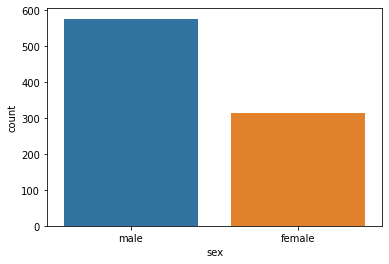

In [52]:
cat_summary(df, "sex", plot=True)

        sex      Ratio
male    577  64.758698
female  314  35.241302
##########################################


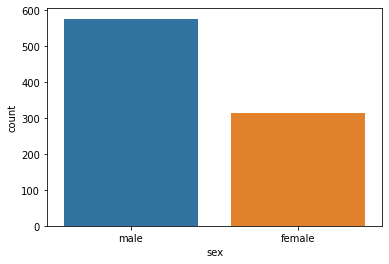

   embarked      Ratio
S       644  72.278339
C       168  18.855219
Q        77   8.641975
##########################################


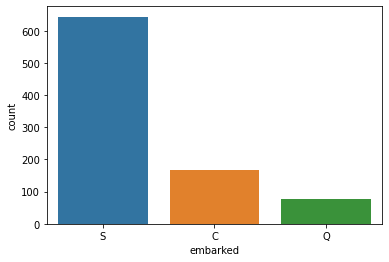

        class      Ratio
Third     491  55.106622
First     216  24.242424
Second    184  20.650954
##########################################


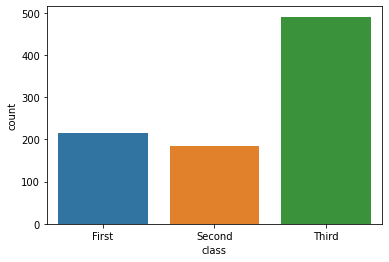

       who      Ratio
man    537  60.269360
woman  271  30.415264
child   83   9.315376
##########################################


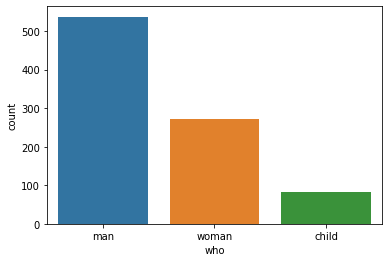

adult_male bool içerdiği için garafik çizimi hatalı oldu.

   deck     Ratio
C    59  6.621773
B    47  5.274972
D    33  3.703704
E    32  3.591470
A    15  1.683502
F    13  1.459035
G     4  0.448934
##########################################


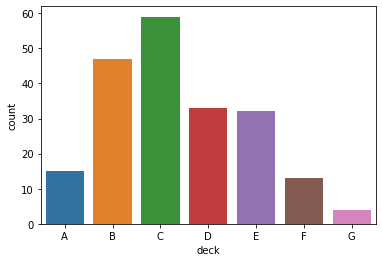

             embark_town      Ratio
Southampton          644  72.278339
Cherbourg            168  18.855219
Queenstown            77   8.641975
##########################################


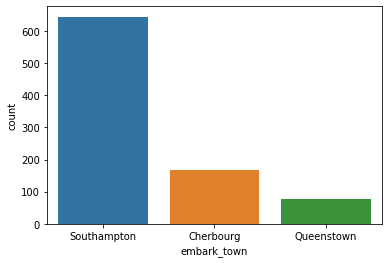

     alive      Ratio
no     549  61.616162
yes    342  38.383838
##########################################


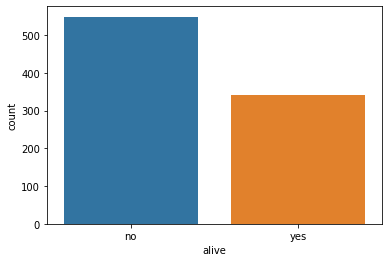

alone bool içerdiği için garafik çizimi hatalı oldu.

   survived      Ratio
0       549  61.616162
1       342  38.383838
##########################################


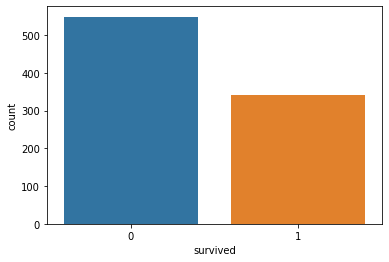

   pclass      Ratio
3     491  55.106622
1     216  24.242424
2     184  20.650954
##########################################


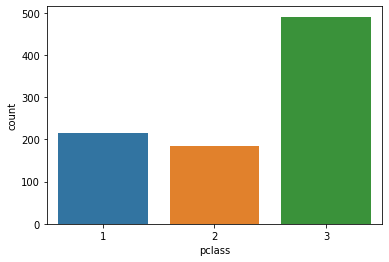

   sibsp      Ratio
0    608  68.237935
1    209  23.456790
2     28   3.142536
4     18   2.020202
3     16   1.795735
8      7   0.785634
5      5   0.561167
##########################################


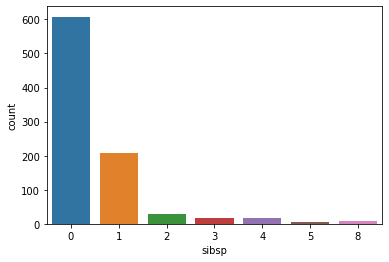

   parch      Ratio
0    678  76.094276
1    118  13.243547
2     80   8.978676
3      5   0.561167
5      5   0.561167
4      4   0.448934
6      1   0.112233
##########################################


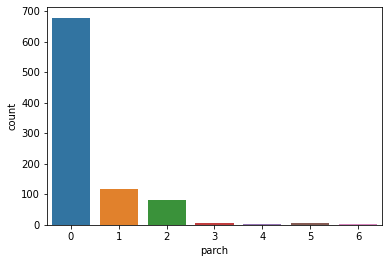

In [57]:
for col in cat_cols:
    if df[col].dtypes == "bool":
        print(col, "bool içerdiği için garafik çizimi hatalı oldu.\n")
    else:
        cat_summary(df, col, plot = True)

In [58]:
# Bu hatayı düzeltelim:
df["adult_male"].astype(int)

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: adult_male, Length: 891, dtype: int32

        sex      Ratio
male    577  64.758698
female  314  35.241302
##########################################


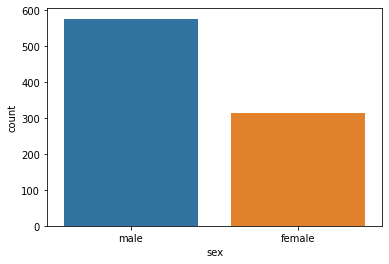

   embarked      Ratio
S       644  72.278339
C       168  18.855219
Q        77   8.641975
##########################################


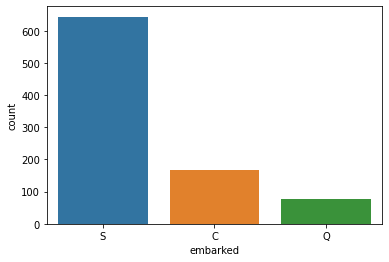

        class      Ratio
Third     491  55.106622
First     216  24.242424
Second    184  20.650954
##########################################


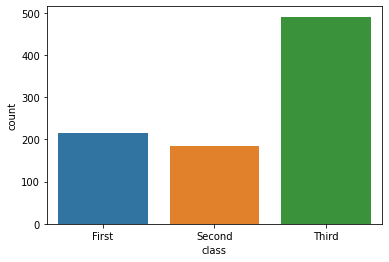

       who      Ratio
man    537  60.269360
woman  271  30.415264
child   83   9.315376
##########################################


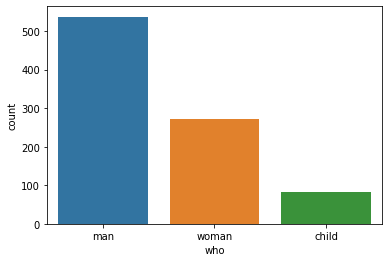

   adult_male     Ratio
1         537  60.26936
0         354  39.73064
##########################################


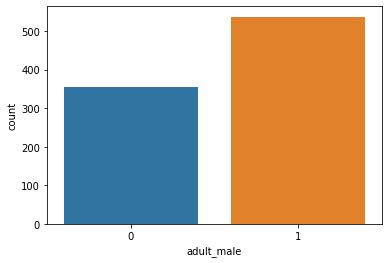

   deck     Ratio
C    59  6.621773
B    47  5.274972
D    33  3.703704
E    32  3.591470
A    15  1.683502
F    13  1.459035
G     4  0.448934
##########################################


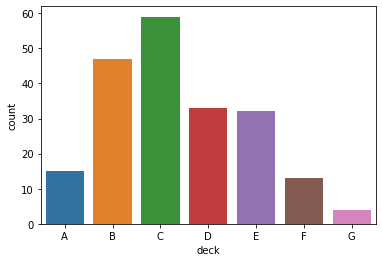

             embark_town      Ratio
Southampton          644  72.278339
Cherbourg            168  18.855219
Queenstown            77   8.641975
##########################################


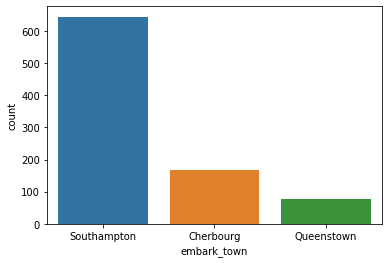

     alive      Ratio
no     549  61.616162
yes    342  38.383838
##########################################


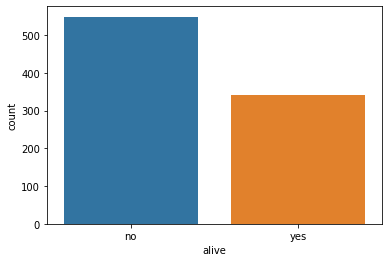

   alone     Ratio
1    537  60.26936
0    354  39.73064
##########################################


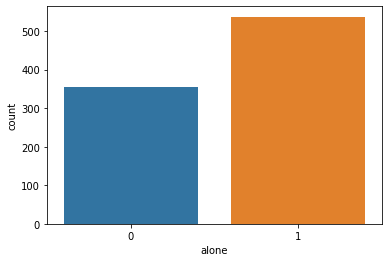

   survived      Ratio
0       549  61.616162
1       342  38.383838
##########################################


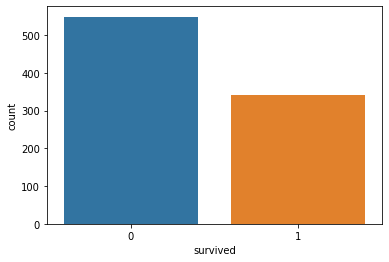

   pclass      Ratio
3     491  55.106622
1     216  24.242424
2     184  20.650954
##########################################


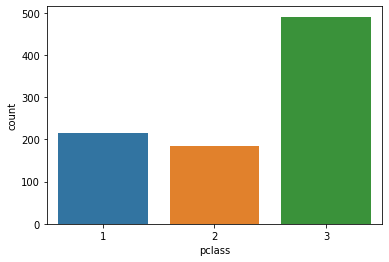

   sibsp      Ratio
0    608  68.237935
1    209  23.456790
2     28   3.142536
4     18   2.020202
3     16   1.795735
8      7   0.785634
5      5   0.561167
##########################################


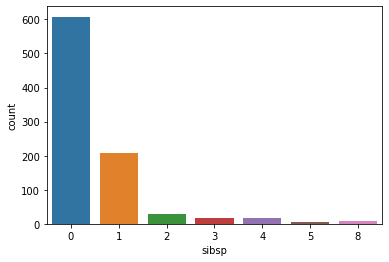

   parch      Ratio
0    678  76.094276
1    118  13.243547
2     80   8.978676
3      5   0.561167
5      5   0.561167
4      4   0.448934
6      1   0.112233
##########################################


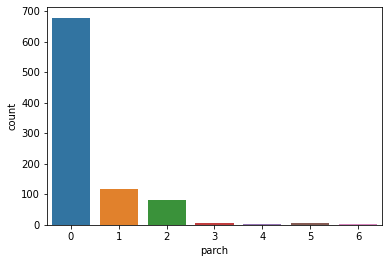

In [62]:
# Onlarca varsa programatik olarak böyle yapılır:
for col in cat_cols:
    if df[col].dtypes == "bool":
        df[col] = df[col].astype(int)
    else:
        cat_summary(df, col, plot = True)

        sex      Ratio
male    577  64.758698
female  314  35.241302
##########################################


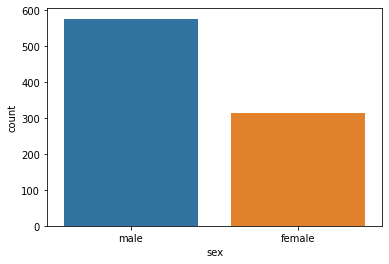

   embarked      Ratio
S       644  72.278339
C       168  18.855219
Q        77   8.641975
##########################################


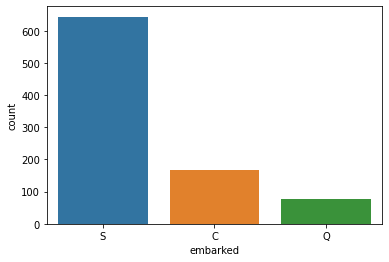

        class      Ratio
Third     491  55.106622
First     216  24.242424
Second    184  20.650954
##########################################


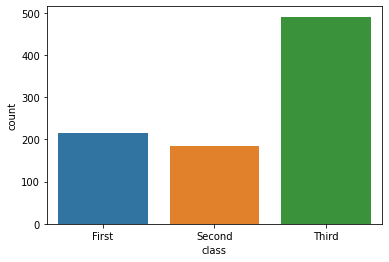

       who      Ratio
man    537  60.269360
woman  271  30.415264
child   83   9.315376
##########################################


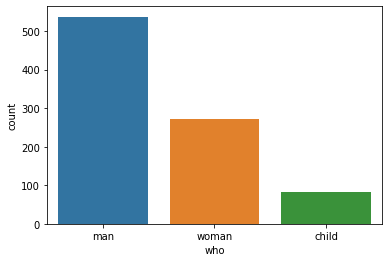

   adult_male     Ratio
1         537  60.26936
0         354  39.73064
##########################################


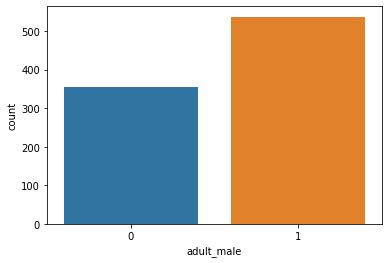

   deck     Ratio
C    59  6.621773
B    47  5.274972
D    33  3.703704
E    32  3.591470
A    15  1.683502
F    13  1.459035
G     4  0.448934
##########################################


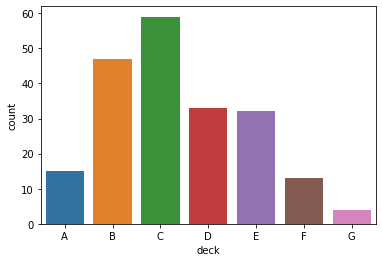

             embark_town      Ratio
Southampton          644  72.278339
Cherbourg            168  18.855219
Queenstown            77   8.641975
##########################################


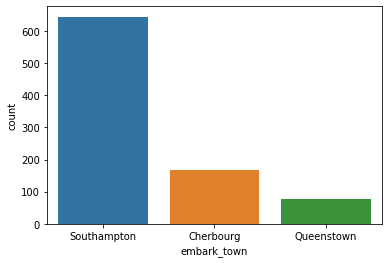

     alive      Ratio
no     549  61.616162
yes    342  38.383838
##########################################


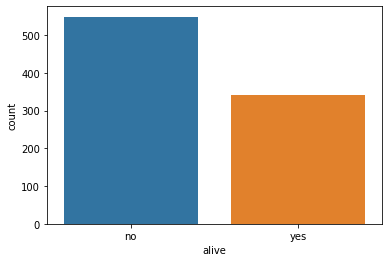

   alone     Ratio
1    537  60.26936
0    354  39.73064
##########################################


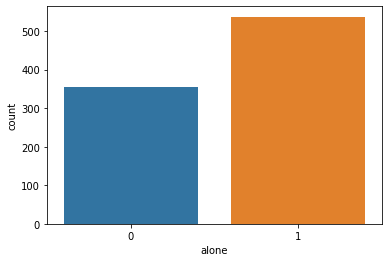

   survived      Ratio
0       549  61.616162
1       342  38.383838
##########################################


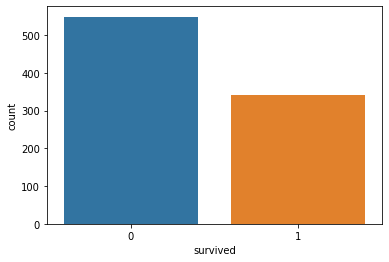

   pclass      Ratio
3     491  55.106622
1     216  24.242424
2     184  20.650954
##########################################


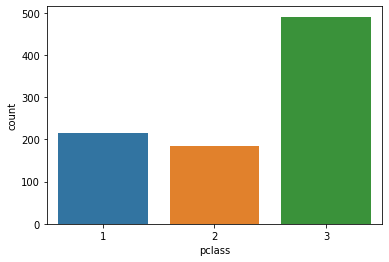

   sibsp      Ratio
0    608  68.237935
1    209  23.456790
2     28   3.142536
4     18   2.020202
3     16   1.795735
8      7   0.785634
5      5   0.561167
##########################################


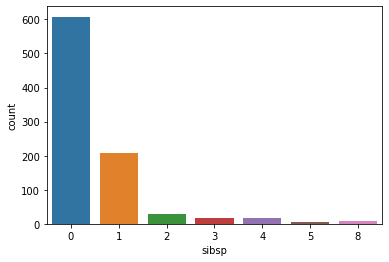

   parch      Ratio
0    678  76.094276
1    118  13.243547
2     80   8.978676
3      5   0.561167
5      5   0.561167
4      4   0.448934
6      1   0.112233
##########################################


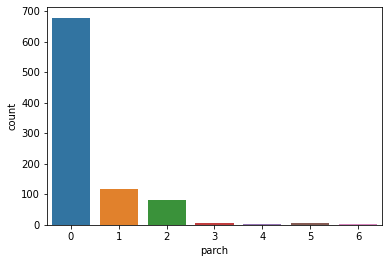

In [63]:
for col in cat_cols:
    if df[col].dtypes == "bool":
        df[col] = df[col].astype(int)
        cat_summary(df, col, plot=True)

    else:
        cat_summary(df, col, plot=True)

In [64]:
# Bu işlemi  yapıyoruz ama biz en baltaki basit işlemi kabul ediyor olacağız.
# Ufacık bir değişiklik sonucu fonksiyon ne kadar da karmaşık hale geldi görüyoruz.
def cat_summary(dataframe, col_name, plot=False):

    if dataframe[col_name].dtypes == "bool":
        dataframe[col_name] = dataframe[col_name].astype(int)

        print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                            "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
        print("##########################################")

        if plot:
            sns.countplot(x=dataframe[col_name], data=dataframe)
            plt.show(block=True)
    else:
        print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                            "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
        print("##########################################")

        if plot:
            sns.countplot(x=dataframe[col_name], data=dataframe)
            plt.show(block=True)


   adult_male     Ratio
1         537  60.26936
0         354  39.73064
##########################################


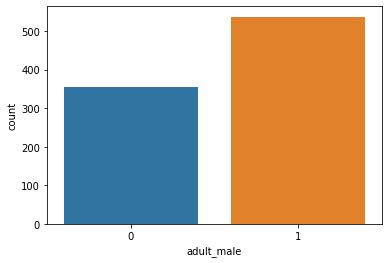

In [65]:
# Bu değişken hata veren değişkenlerden birisiydi. Çalıştı.
cat_summary(df, "adult_male", plot=True)

In [66]:
# İlk hali buydu, bu kısmı dikkate alıyor olacağız. Elimiz ayağımız olan fonksiyon budur.
def cat_summary(dataframe, col_name):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")

In [67]:
cat_summary(df, "sex")

        sex      Ratio
male    577  64.758698
female  314  35.241302
##########################################
